In [3]:
#importing liabraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt
import math
import seaborn as sns


In [4]:
df= pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1=978307200&period2=1602979200&interval=1d&events=history&includeAdjustedClose=true")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,1320.280029,1320.280029,1276.050049,1283.270020,1283.270020,1129400000
1,2001-01-03,1283.270020,1347.760010,1274.619995,1347.560059,1347.560059,1880700000
2,2001-01-04,1347.560059,1350.239990,1329.140015,1333.339966,1333.339966,2131000000
3,2001-01-05,1333.339966,1334.770020,1294.949951,1298.349976,1298.349976,1430800000
4,2001-01-08,1298.349976,1298.349976,1276.290039,1295.859985,1295.859985,1115500000


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4.980000e+03
mean,1644.797604,1654.172952,1634.592972,1645.017200,1645.017200,3.272782e+09
std,663.867441,665.903384,661.494154,663.946038,663.946038,1.474020e+09
min,679.280029,695.270020,666.789978,676.530029,676.530029,3.560700e+08
25%,1148.999970,1157.667480,1140.119995,1149.467499,1149.467499,2.076878e+09
50%,1363.604981,1369.195007,1355.225036,1364.110046,1364.110046,3.337025e+09
75%,2078.070007,2085.909912,2067.010010,2079.115051,2079.115051,4.038788e+09
max,3564.739990,3588.110107,3535.229980,3580.840088,3580.840088,1.145623e+10


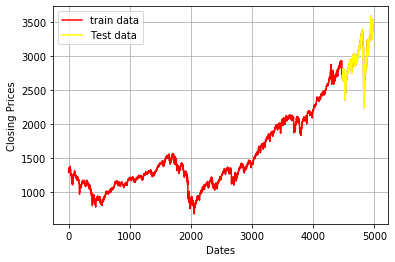

In [6]:
#train & test

train_data, test_data = df[:int(len(df)*0.9)], df[int(len(df)*0.9):]
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df['Close'], 'red', label= 'train data')
plt.plot(test_data['Close'], 'yellow', label= 'Test data')
plt.legend()

In [7]:

#arima
model = ARIMA(train_data['Close'], order=(0,1,1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4481
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -18567.612
Method:                       css-mle   S.D. of innovations             15.252
Date:                Tue, 20 Oct 2020   AIC                          37141.224
Time:                        13:14:08   BIC                          37160.447
Sample:                             1   HQIC                         37147.999
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3067      0.213      1.441      0.150      -0.110       0.724
ma.L1.D.Close    -0.0661      0.016     -4.222      0.000      -0.097      -0.035
                                    Root

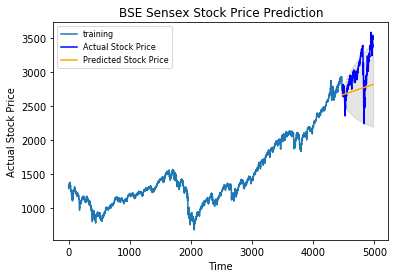

In [8]:

#prediction
fc, se, conf = fitted.forecast(498, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.plot(train_data['Close'], label='training')
plt.plot(test_data['Close'], color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('BSE Sensex Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [9]:
# Performance report
mse = mean_squared_error(test_data['Close'], fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data['Close'], fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data['Close'], fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data['Close'])/np.abs(test_data['Close']))
print('MAPE: '+str(mape))

MSE: 107536.746902914
MAE: 272.76243899844286
RMSE: 327.9279599285703
MAPE: 0.08809244241883206


In [20]:
df1 = pd.read_csv("india-news-headlines.csv")

In [23]:
df1.describe()

,publish_date
count,3.297172e+06
mean,2.012470e+07
std,4.896213e+04
min,2.001010e+07
25%,2.009101e+07
50%,2.013071e+07
75%,2.016110e+07
max,2.020063e+07


In [24]:
df1.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [25]:
df1['publish_date'] = pd.to_datetime(df1['publish_date'],format='%Y%m%d')

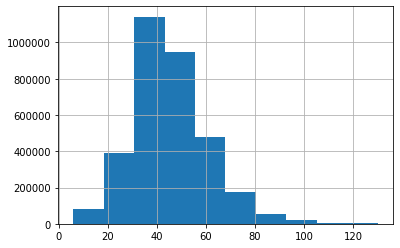

In [26]:
df1['headline_text'].str.len().hist()
plt.show()

In [27]:

df2 = df1[df1['publish_date']> '2005-06-29'].reset_index(drop=True)

In [28]:
df2.shape

(2941736, 3)

In [29]:
headline_cats = [cat for cat in df2['headline_category'].value_counts().index if 'business' in cat]

In [30]:
headline_cats

['business.india-business',
 'business.international-business',
 'business.personal-finance',
 'business',
 'india-business-news-wire',
 'business.faqs.income-tax-faqs',
 'business.mf-simplified.mf-news',
 'business.mf-simplified.jargon-busters.debt',
 'business.faqs.aadhar-faqs',
 'business.mf-simplified.jargon-busters.equity',
 'business.faqs.gst-faqs',
 'business.mf-simplified.faq']

In [31]:
df2 = df2.loc[df2['headline_category'].str.find('business') !=-1].reset_index(drop=True)

In [32]:

df2.head()

,publish_date,headline_category,headline_text
0,2005-07-01,business.india-business,BK Birla group pens Rs 1;000-cr investment plan
1,2005-07-01,business.india-business,Acquisitions are way forward: Paul
2,2005-07-01,business.india-business,Central PSUs get purchase preference in govt o...
3,2005-07-01,business.india-business,Govt removes hurdles for GM to buy Daewoo Indi...
4,2005-07-01,business.india-business,Anil Ambani to make it big in entertainment


In [33]:
df3 = df2.groupby('publish_date').agg({'headline_category':'first','headline_text': '. '.join}).reset_index()


In [34]:
df3.head


<bound method NDFrame.head of      publish_date        headline_category  \
0      2005-07-01  business.india-business   
1      2005-07-02  business.india-business   
2      2005-07-03  business.india-business   
3      2005-07-04  business.india-business   
4      2005-07-05  business.india-business   
5      2005-07-06  business.india-business   
6      2005-07-07  business.india-business   
7      2005-07-08  business.india-business   
8      2005-07-09  business.india-business   
9      2005-07-10  business.india-business   
10     2005-07-11  business.india-business   
11     2005-07-12  business.india-business   
12     2005-07-13  business.india-business   
13     2005-07-14  business.india-business   
14     2005-07-15  business.india-business   
15     2005-07-16  business.india-business   
16     2005-07-17  business.india-business   
17     2005-07-18  business.india-business   
18     2005-07-19  business.india-business   
19     2005-07-20  business.india-business   
20  